In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snd
df=pd.read_csv("bank_data.csv")

C:\Users\rashi\AppData\Local\Temp\ipykernel_25844\1411406314.py:5: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("bank_data.csv")


In [46]:
df.head(10)
df.isnull().sum()
#this command show how many null values are present in each column 

banking marketing     0
Unnamed: 1           21
Unnamed: 2            0
Unnamed: 3            1
Unnamed: 4            0
Unnamed: 5            1
Unnamed: 6            0
Unnamed: 7            1
Unnamed: 8            0
Unnamed: 9            1
Unnamed: 10           0
Unnamed: 11           1
Unnamed: 12          50
Unnamed: 13           0
Unnamed: 14           1
Unnamed: 15           1
Unnamed: 16           1
Unnamed: 17           0
Unnamed: 18          30
dtype: int64

In [47]:
df.tail(10)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
45203,45202,53.0,100000,583,married,"management,tertiary",yes,no,no,no,cellular,17,"nov, 2017",3.76666666666667 min,1,184,4,success,yes
45204,45203,34.0,50000,557,single,"admin.,secondary",yes,no,no,no,cellular,17,"nov, 2017",3.73333333333333 min,1,-1,0,unknown,yes
45205,45204,23.0,4000,113,single,"student,tertiary",no,no,no,no,cellular,17,"nov, 2017",4.43333333333333 min,1,-1,0,unknown,yes
45206,45205,73.0,55000,2850,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",5 min,1,40,8,failure,yes
45207,45206,25.0,60000,505,single,"technician,secondary",yes,no,no,yes,cellular,17,"nov, 2017",6.43333333333333 min,2,-1,0,unknown,yes
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45212,45211,37.0,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


In [35]:
df_cleaned = df.dropna()
#this command clearifies all the null values present in the dataset

print(df_cleaned)


        age          job  marital  education default  balance housing loan  \
0      59.0       admin.  married  secondary      no     2343     yes   no   
2      41.0   technician  married  secondary      no     1270     yes   no   
3      55.0     services  married  secondary      no     2476     yes   no   
4      54.0       admin.  married   tertiary      no      184      no   no   
5      42.0   management   single   tertiary      no        0     yes  yes   
...     ...          ...      ...        ...     ...      ...     ...  ...   
11157  33.0  blue-collar   single    primary      no        1     yes   no   
11158  39.0     services  married  secondary      no      733      no   no   
11159  32.0   technician   single  secondary      no       29      no   no   
11160  43.0   technician  married  secondary      no        0      no  yes   
11161  34.0   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous

In [36]:
df.tail(10)
df.isnull().sum()

age          2
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      7
day          0
month        0
duration     9
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

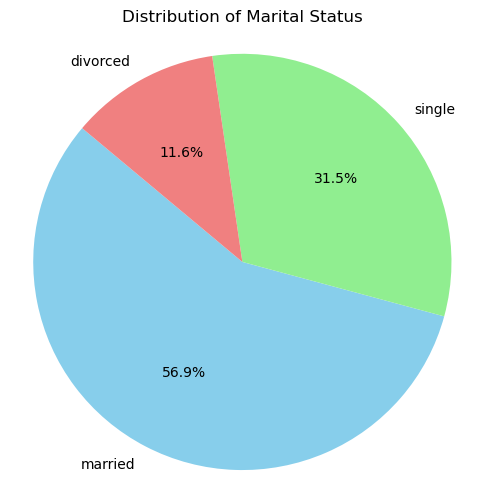

In [37]:
value_counts = df['marital'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Marital Status')
plt.axis('equal')  

plt.show()

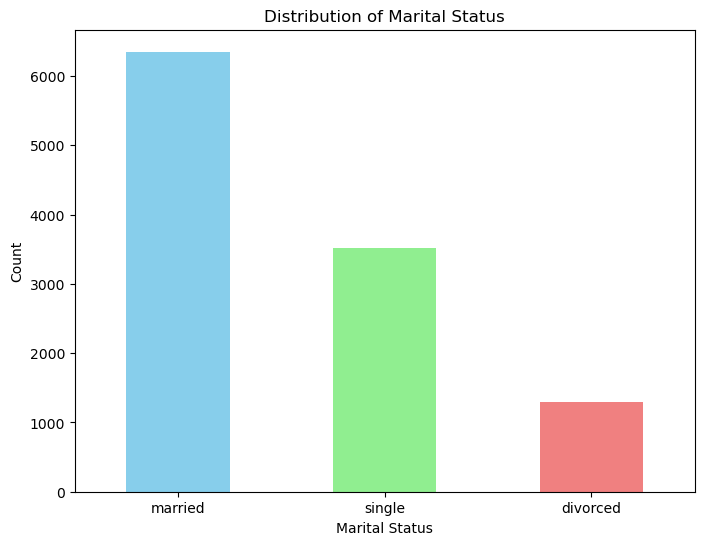

In [38]:
value_counts = df['marital'].value_counts()


plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  

plt.show()

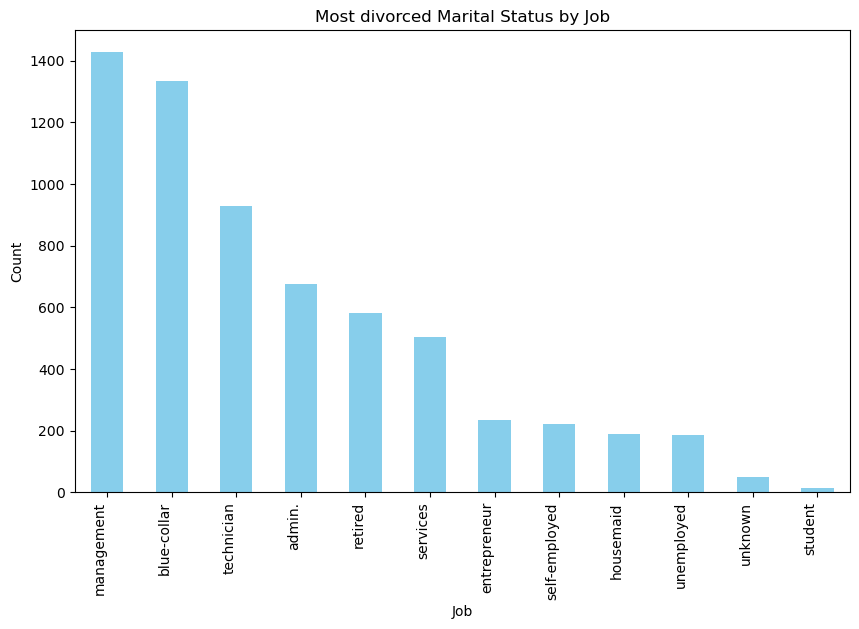

In [39]:


married_df = df[df['marital'] == 'married']


job_counts = married_df['job'].value_counts()


plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Most divorced Marital Status by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right') 

plt.show()


<Figure size 1000x600 with 0 Axes>

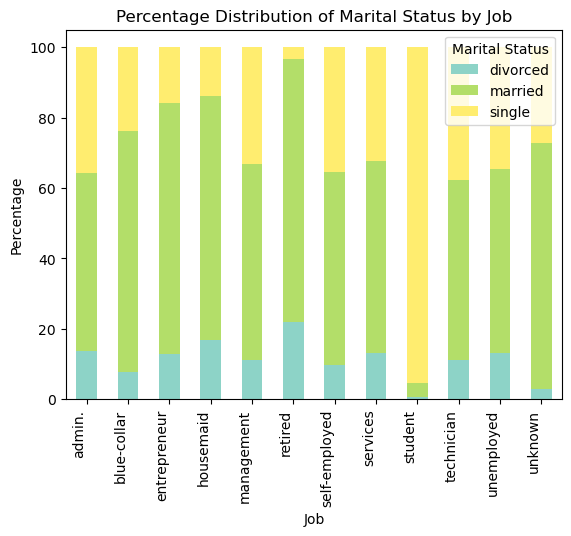

In [40]:
grouped = df.groupby(['job', 'marital']).size().unstack(fill_value=0)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0)  *100

# Create a stacked bar graph
plt.figure(figsize=(10, 6))
grouped_percentage.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Percentage Distribution of Marital Status by Job')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')  
plt.legend(title='Marital Status')

plt.show()

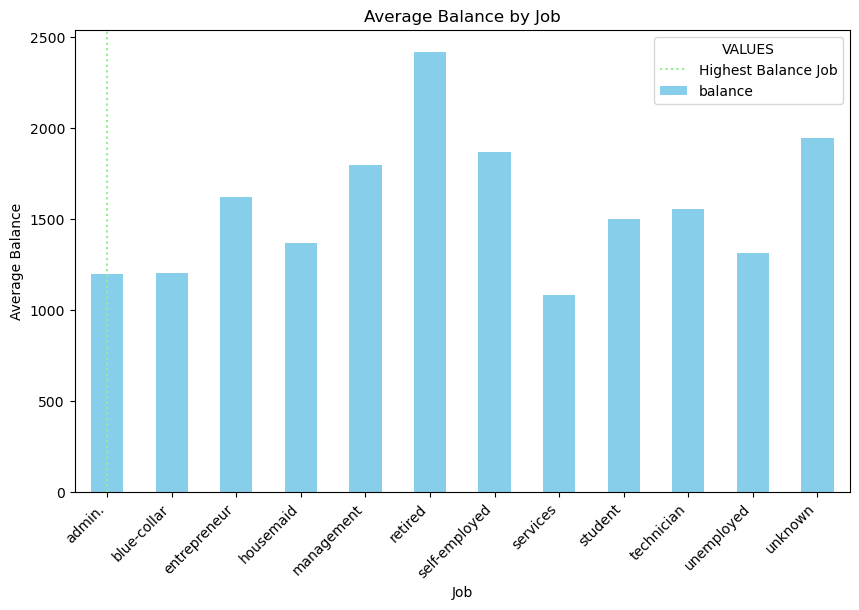

In [41]:
grouped = df.groupby('job')['balance'].mean()

# Find the job with the highest balance
highest_balance_job = grouped.idxmax()

# Create a bar graph
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Average Balance by Job')
plt.xlabel('Job')
plt.ylabel('Average Balance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.axvline(x=highest_balance_job, color='lightgreen', linestyle=':', label='Highest Balance Job')
plt.legend(title="VALUES")
plt.show()

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042.0,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,NaN,5,may,1467.0,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389.0,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579.0,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673.0,2,-1,0,unknown,yes


## Bivariate Analysis

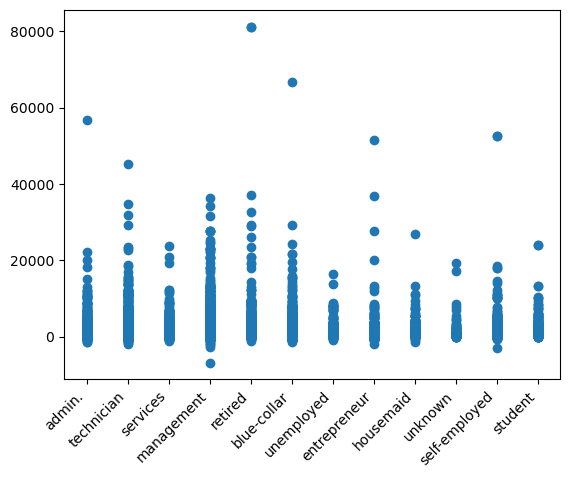

In [43]:
plt.scatter(df.job,df.balance)
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
sns.pairplot(data=df,var=["day","balance","age"])
plt.show()

NameError: name 'sns' is not defined

In [ ]:
df.describe()
df.month